In [2]:
import pandas as pd

NOTE: Define "Stress" vs "No Stress"

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense,LSTM
from keras.models import Sequential

In [3]:
stress_df = pd.read_csv("/Users/jenniferrodrigueztrujillo/amakharwal/Website-data/stress.csv")

## Exploratory Analysis:

In [4]:
print("'Data' type: ", type(stress_df) )
print("'Data' contains", len(stress_df), "rows.")
print("'Data' contains the following dimensions: ", stress_df.shape)

'Data' type:  <class 'pandas.core.frame.DataFrame'>
'Data' contains 2838 rows.
'Data' contains the following dimensions:  (2838, 116)


In [5]:
stress_df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [6]:
stress_df.info

<bound method DataFrame.info of              subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     He said he had not felt that way before, sugge...  33181      1   
1     Hey there r/assistance, Not sure if this is th...   2606      0   
2     My mom then hit me with the newspaper and it s...  38816      1   
3     until i met my new boyfriend, he is amazing, h...    239      1   
4     October 

In [7]:
stress_df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [8]:
stress_df.describe(include=object)

,subreddit,post_id,sentence_range,text
count,2838,2838,2838,2838
unique,10,2343,173,2820
top,ptsd,7o5n2d,"(0, 5)","Hello, You are invited to complete a survey fo..."
freq,584,6,337,4


#### Checking Nulls:

In [9]:
stress_df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [15]:
import pandas as pd
pd.set_option('display.max_rows', None)
#stress_df.isna().sum()
stress_df.sum()

subreddit                   ptsdassistanceptsdrelationshipssurvivorsofabus...
post_id                     8601tu8lbrx99ch1zh7rorpp9p2gbc7tx7et7iphly5m3k...
sentence_range              (15, 20)(0, 5)(15, 20)[5, 10][0, 5](30, 35)[25...
text                        said felt way sugget go rest trigger ahead you...
id                                                                   39028174
label                                                                    1488
confidence                                                            2295.86
social_timestamp                                                4308387751949
social_karma                                                            51828
syntax_ari                                                              13294
lex_liwc_WC                                                            244057
lex_liwc_Analytic                                                      100014
lex_liwc_Clout                                                  

## Text Cleaning :

In [4]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
stress_df["text"] = stress_df["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jenniferrodrigueztrujillo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#stress_df['text']

In [6]:
#!pip install wordcloud

## Visualization: 
#### (Words most used by  people)

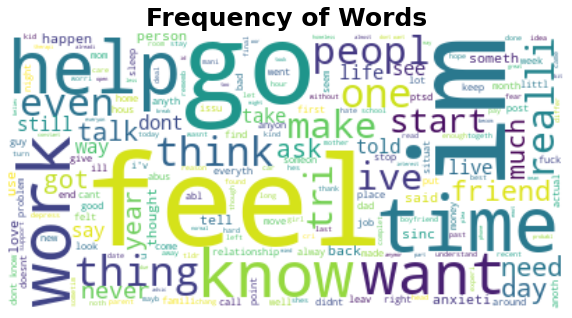

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in stress_df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear', )
plt.title("Frequency of Words", fontsize = 25, weight='bold')
plt.axis("off")
plt.show()

What do we define a "stopword" as?

In [15]:
#stress_df.overall.value_counts()

## Stress Detection Model:

In [32]:
data = stress_df.copy()

In [30]:
lables_text = data[['label', 'text']]
lables_text

,label,text
0,1,said felt way sugget go rest trigger ahead you...
1,0,hey rassist sure right place post goe im curr...
2,1,mom hit newspap shock would know dont like pla...
3,1,met new boyfriend amaz kind sweet good student...
4,1,octob domest violenc awar month domest violenc...
5,1,think doesnt want put effort relationship work...
6,0,big compani luckili didnt see time act though ...
7,1,clear okay monday think human brain work tri...
8,1,actual give assist half emerg fee come help so...
9,1,feel like street life fuck head there much don...


In [34]:
data.label.value_counts()

1    1488
0    1350
Name: label, dtype: int64

#### Mapping Binary to Labels:

In [33]:
# data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
# data = data[["text", "label"]]
# print(data.head())

In [ ]:
# stress_df.label.value_counts()

NOTE: Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 

In [37]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

#### Defining adjective, verbs, nouns:

In [38]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [39]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

#### NOTE: semming(ROOT of word) and lemmatization(CONTEXT word is being used) cuts words to get root words
- lemmatization could be better

In [ ]:
#nltk.download()
#data.loc[data.bidder == 'parakeet2004', 'bidderrate']

In [41]:
data['text'] = data['text'].apply(lemmatize_words)

In [44]:
data['text']

0       say felt way sugget go rest trigger ahead youi...
1       hey rassist sure right place post goe im curre...
2       mom hit newspap shock would know dont like pla...
3       met new boyfriend amaz kind sweet good student...
4       octob domest violenc awar month domest violenc...
5       think doesnt want put effort relationship work...
6       big compani luckili didnt see time act though ...
7       clear okay monday think human brain work trip ...
8       actual give assist half emerg fee come help so...
9       feel like street life fuck head much dont even...
10      next week i'll fli famili vacat flight long ms...
11      everyth set im almost panic attack im go dad s...
12      i'v take mg zoloft month yeah super small dose...
13      place citi shelter space u wont put babi liter...
14      past coupl month bad anxieti gotten bad effect...
15      ask three time happen third time cri go home m...
16      sensat last hour seem like circul problem pani...
17      hurt l

## Training and Test Data for Accuracy Measure:

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data.text,data.label, test_size = 0.2, random_state= 0 )



In [49]:
print("The shape of x_train:",x_train.shape)
print("The shape of x_test:",x_test.shape)
print("The shape of y_train:",y_train.shape)
print("The shape of y_test:",y_test.shape)

The shape of x_train: (2270,)
The shape of x_test: (568,)
The shape of y_train: (2270,)
The shape of y_test: (568,)


In [53]:
stress_1 = x_train[y_train[y_train == 1].index]    #"good" in Kaggle
no_stress_0 = x_train[y_train[y_train == 0].index] #"bad" in Kaggle

In [54]:
x_train.shape,stress_1.shape,no_stress_0.shape

((2270,), (1193,), (1077,))

#### Visualization for Stress:

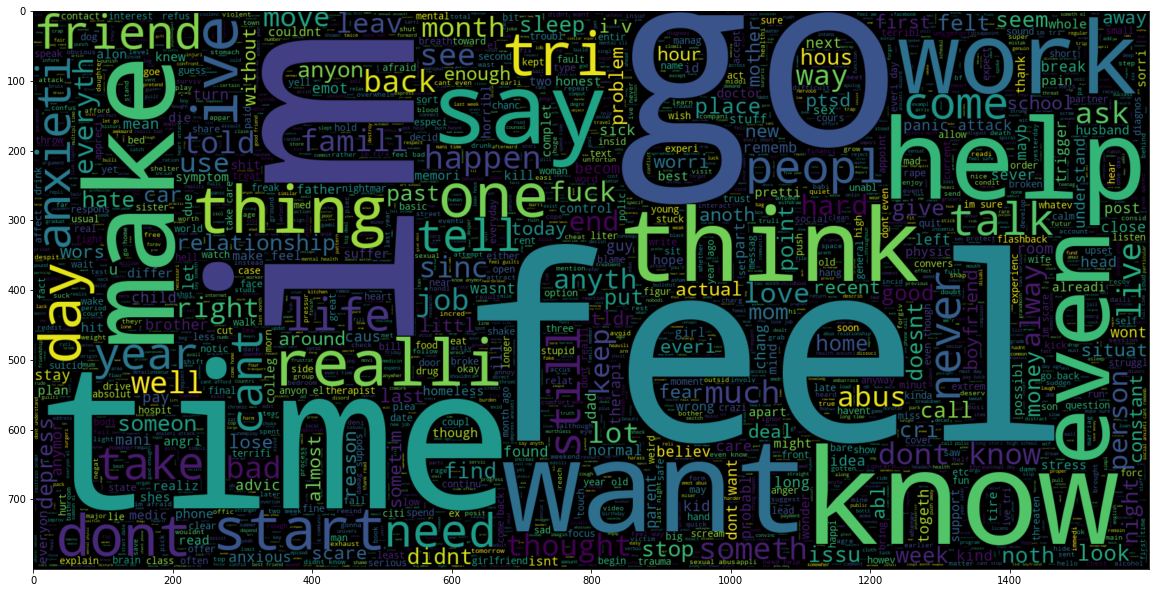

In [55]:
plt.figure(figsize = (20,20)) # Text with Stress
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(stress_1))
plt.imshow(wc,interpolation = 'bilinear')

#### Visualization for No Stress:

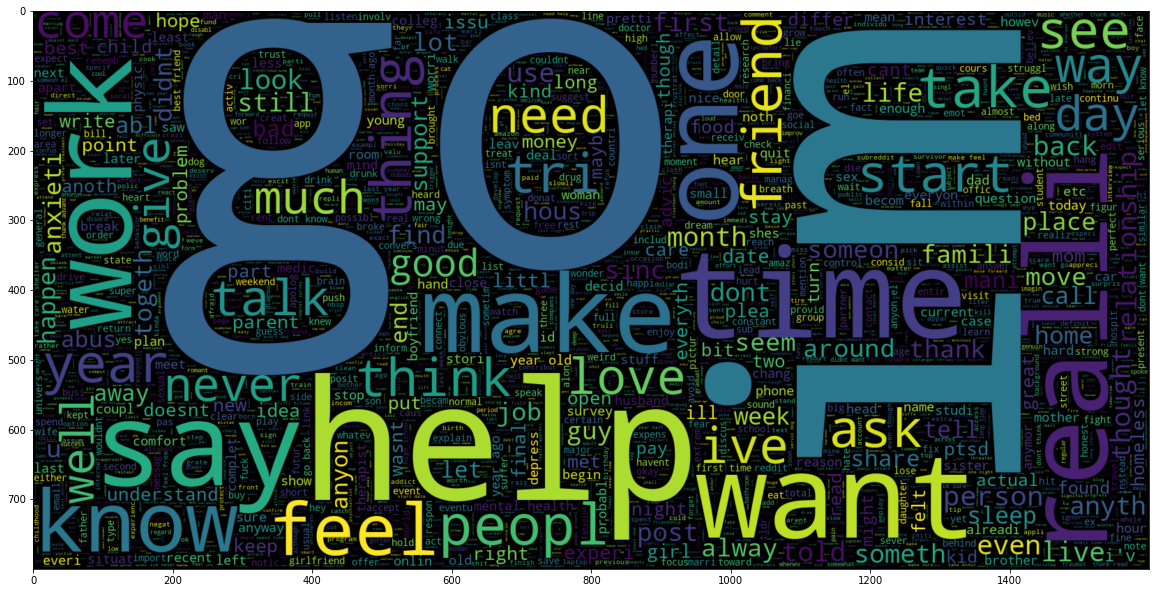

In [56]:
plt.figure(figsize = (20,20)) # Text with No Stress
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(no_stress_0))
plt.imshow(wc,interpolation = 'bilinear')

## Bag of Words - Testing for Accuracy:

In [57]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (2270, 139009)
BOW_cv_test: (568, 139009)


In [58]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(x_train)
#transformed test reviews
tv_test_reviews=tv.transform(x_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (2270, 139009)
Tfidf_test: (568, 139009)


NOTE: What is the difference between "TfidfVectorizer" and "CountVectorizer"?
- TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. 
- TfidfVectorizer : TermFrequency-InDocumentFrequency: The number of times a term appears in a single document over the number of time it appears in a number of documents
- CountVectorizer: Count Vectorizer is a way to convert a given set of strings into a frequency representation.


#### Training model with Logistic Regression:

In [81]:
lr=LogisticRegression(penalty='l2',max_iter=1000,C=1,random_state=0)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=1000, random_state=0)
LogisticRegression(C=1, max_iter=1000, random_state=0)


In [82]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)

In [83]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.5845070422535211
lr_tfidf_score : 0.5563380281690141


### calculate the error alongside the increased epochs

In [63]:
#Classification report for bag of words
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['0','1'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['0','1'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

           0       0.64      0.32      0.42       273
           1       0.57      0.83      0.68       295

    accuracy                           0.58       568
   macro avg       0.60      0.57      0.55       568
weighted avg       0.60      0.58      0.55       568

              precision    recall  f1-score   support

           0       0.89      0.09      0.16       273
           1       0.54      0.99      0.70       295

    accuracy                           0.56       568
   macro avg       0.71      0.54      0.43       568
weighted avg       0.71      0.56      0.44       568



In [64]:
#training the model
mnb=MultinomialNB()
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,y_train)
print(mnb_bow)
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,y_train)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [65]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [66]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.5933098591549296
mnb_tfidf_score : 0.5915492957746479


In [67]:
mnb_bow_report = classification_report(y_test,mnb_bow_predict,target_names = ['0','1'])
print(mnb_bow_report)
mnb_tfidf_report = classification_report(y_test,mnb_tfidf_predict,target_names = ['0','1'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.60      0.47      0.52       273
           1       0.59      0.71      0.65       295

    accuracy                           0.59       568
   macro avg       0.59      0.59      0.58       568
weighted avg       0.59      0.59      0.59       568

              precision    recall  f1-score   support

           0       0.64      0.34      0.44       273
           1       0.57      0.82      0.68       295

    accuracy                           0.59       568
   macro avg       0.61      0.58      0.56       568
weighted avg       0.61      0.59      0.57       568



In [68]:
model = Sequential()
model.add(Dense(units = 75 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu')) 
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [69]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                10425750  
                                                                 
 dense_1 (Dense)             (None, 50)                3800      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 10,431,096
Trainable params: 10,431,096
Non-trainable params: 0
_________________________________________________________________


In [74]:
y_train = y_train.to_numpy()

In [86]:
model.fit(cv_train_reviews,y_train , epochs = 20) #X_train = X_train.toarray()

Epoch 1/20
71/71 [==============================] - 15s 177ms/step - loss: 0.0073 - accuracy: 0.9974
Epoch 2/20
71/71 [==============================] - 21s 300ms/step - loss: 0.0072 - accuracy: 0.9974
Epoch 3/20
71/71 [==============================] - 18s 243ms/step - loss: 0.0073 - accuracy: 0.9974
Epoch 4/20
71/71 [==============================] - 16s 219ms/step - loss: 0.0072 - accuracy: 0.9974
Epoch 5/20
71/71 [==============================] - 12s 164ms/step - loss: 0.0070 - accuracy: 0.9974
Epoch 6/20
71/71 [==============================] - 13s 186ms/step - loss: 0.0072 - accuracy: 0.9974
Epoch 7/20
71/71 [==============================] - 13s 186ms/step - loss: 0.0074 - accuracy: 0.9974
Epoch 8/20
71/71 [==============================] - 12s 167ms/step - loss: 0.0068 - accuracy: 0.9974
Epoch 9/20
71/71 [==============================] - 54s 766ms/step - loss: 0.0072 - accuracy: 0.9974
Epoch 10/20
71/71 [==============================] - 51s 713ms/step - loss: 0.0069 - accura

In [87]:
y_test = y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
model.evaluate(cv_test_reviews,y_test)[1]

## Training and test sets(In the Case we add our own data):

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
x = np.array(stress_df["text"])
y = np.array(stress_df["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

#### Fit Model:

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)